In [209]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/test.csv
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/sample_submission.csv


# Importing all necessary libraries

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading the train and test data

In [211]:
test = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv')
train_data = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv')

In [212]:
test = test.drop('Id',axis=1)
train_data=train_data.drop('Id',axis=1)

In [213]:
test.drop('Alley',axis=1,inplace=True)
test.drop('PoolQC',axis=1,inplace=True)
test.drop('Fence',axis=1,inplace=True)
test.drop('MiscFeature',axis=1,inplace=True)

test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [214]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [215]:
test.shape

(1459, 75)

In [216]:
train_price = train_data['SalePrice']
train_features = train_data.drop('SalePrice',axis=1)
train_features.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [217]:
train_features.shape

(1460, 79)

In [218]:
train_features = train_features.drop(['Alley','PoolQC','Fence','MiscFeature'],axis = 1)

# Note: Later check the effect of each feature on target

# Splitting the training and validation set

In [219]:
from sklearn.model_selection import train_test_split
X_train, X_val,y_train, y_val = train_test_split(train_features, train_price, test_size = 0.25)

In [220]:
X_train.shape

(1095, 75)

In [221]:
X_val.shape

(365, 75)

In [222]:
test.shape

(1459, 75)

# Divide columns into catagorical and numerical features

In [223]:
cat_col = [col for col in train_features.columns if train_features[col].dtype == 'object']

In [224]:
num_col = list(set(train_features.columns) - set(cat_col))

In [225]:
len(cat_col)

39

In [226]:
len(num_col)

36

In [227]:
num_col

['GrLivArea',
 'Fireplaces',
 'TotRmsAbvGrd',
 'BsmtFinSF1',
 '3SsnPorch',
 'BsmtFinSF2',
 '2ndFlrSF',
 'FullBath',
 'PoolArea',
 'OverallQual',
 'MasVnrArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'MiscVal',
 'YearRemodAdd',
 'BedroomAbvGr',
 'LotFrontage',
 'TotalBsmtSF',
 'YearBuilt',
 'MSSubClass',
 'HalfBath',
 '1stFlrSF',
 'KitchenAbvGr',
 'YrSold',
 'GarageYrBlt',
 'LowQualFinSF',
 'BsmtUnfSF',
 'OverallCond',
 'MoSold',
 'GarageCars',
 'WoodDeckSF',
 'ScreenPorch',
 'GarageArea',
 'OpenPorchSF',
 'EnclosedPorch',
 'LotArea']

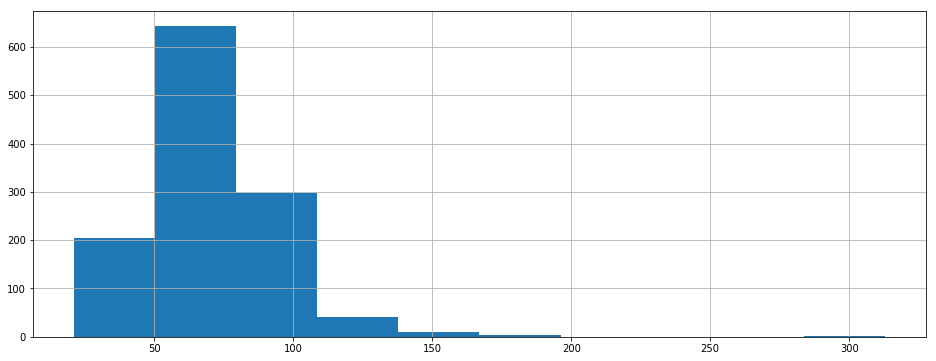

In [228]:
plt.figure(figsize=(16,6))
train_data['LotFrontage'].hist()

# Data Visualization

In [229]:
train_data['LotFrontage']

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [230]:
meen = train_data['LotFrontage'].mean()
meen

70.04995836802665

In [231]:
train_data['LotFrontage'].replace({313:70.04995836802665}, inplace = True)

In [232]:
train_data['LotFrontage']

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [233]:
x=train_data['BsmtFinSF1'].unique()
sorted(x)

[0,
 2,
 16,
 20,
 24,
 25,
 27,
 28,
 33,
 35,
 36,
 40,
 41,
 48,
 49,
 50,
 56,
 57,
 63,
 64,
 72,
 75,
 80,
 81,
 94,
 104,
 108,
 111,
 116,
 120,
 125,
 129,
 131,
 133,
 138,
 141,
 144,
 150,
 152,
 156,
 162,
 165,
 167,
 168,
 170,
 176,
 179,
 180,
 182,
 185,
 187,
 188,
 189,
 191,
 192,
 193,
 194,
 196,
 197,
 203,
 204,
 206,
 209,
 210,
 212,
 213,
 216,
 218,
 219,
 220,
 222,
 223,
 224,
 226,
 228,
 231,
 234,
 236,
 239,
 240,
 241,
 247,
 248,
 249,
 250,
 251,
 252,
 256,
 257,
 259,
 262,
 264,
 266,
 270,
 273,
 275,
 280,
 281,
 282,
 284,
 285,
 288,
 290,
 292,
 294,
 296,
 297,
 298,
 299,
 300,
 301,
 306,
 308,
 309,
 310,
 311,
 312,
 315,
 317,
 319,
 320,
 321,
 322,
 324,
 326,
 328,
 329,
 330,
 331,
 334,
 336,
 338,
 340,
 341,
 344,
 348,
 349,
 350,
 351,
 352,
 353,
 354,
 356,
 358,
 360,
 361,
 364,
 365,
 368,
 369,
 370,
 371,
 374,
 375,
 377,
 378,
 379,
 380,
 381,
 383,
 384,
 385,
 386,
 387,
 388,
 390,
 392,
 394,
 397,
 398,
 399,
 

In [234]:
avg1= train_data['BsmtFinSF1'].mean()
avg1

443.6397260273973

In [235]:
train_data['BsmtFinSF1'].replace({5644:443.6397260273973}, inplace = True)

In [236]:
train_data['BsmtFinSF1']

0       706.0
1       978.0
2       486.0
3       216.0
4       655.0
        ...  
1455      0.0
1456    790.0
1457    275.0
1458     49.0
1459    830.0
Name: BsmtFinSF1, Length: 1460, dtype: float64

In [237]:
train_data['OpenPorchSF_log'] = np.log(train_data['OpenPorchSF']+1)

In [238]:
a = train_data['OpenPorchSF_log']
average = a[a!=0].mean()
average

4.192126388411955

In [239]:
train_data['OpenPorchSF_log'].replace({0:4.192126388411955 }, inplace = True)
train_data['OpenPorchSF_log']

0       4.127134
1       4.192126
2       3.761200
3       3.583519
4       4.442651
          ...   
1455    3.713572
1456    4.192126
1457    4.110874
1458    4.192126
1459    4.234107
Name: OpenPorchSF_log, Length: 1460, dtype: float64

In [240]:
train_data=train_data.drop('OpenPorchSF',axis=1)

In [241]:
b = train_data['1stFlrSF'].unique()
sorted(b)

[334,
 372,
 438,
 480,
 483,
 495,
 520,
 525,
 526,
 536,
 546,
 551,
 561,
 572,
 575,
 576,
 581,
 596,
 600,
 605,
 612,
 616,
 624,
 625,
 626,
 630,
 649,
 658,
 660,
 661,
 663,
 664,
 672,
 673,
 676,
 679,
 680,
 682,
 684,
 686,
 689,
 691,
 693,
 694,
 696,
 697,
 698,
 702,
 703,
 707,
 708,
 713,
 716,
 720,
 725,
 728,
 729,
 734,
 735,
 736,
 738,
 741,
 742,
 747,
 750,
 751,
 752,
 753,
 754,
 755,
 756,
 757,
 760,
 764,
 765,
 767,
 768,
 769,
 770,
 772,
 773,
 774,
 778,
 779,
 780,
 783,
 784,
 786,
 788,
 789,
 790,
 792,
 793,
 794,
 796,
 798,
 799,
 800,
 802,
 803,
 804,
 806,
 807,
 808,
 810,
 811,
 812,
 813,
 814,
 815,
 816,
 818,
 820,
 822,
 824,
 825,
 827,
 829,
 831,
 832,
 833,
 835,
 838,
 840,
 841,
 842,
 845,
 846,
 847,
 848,
 849,
 851,
 854,
 855,
 856,
 858,
 859,
 860,
 861,
 864,
 865,
 866,
 869,
 872,
 874,
 875,
 876,
 877,
 879,
 880,
 882,
 884,
 885,
 886,
 887,
 888,
 889,
 892,
 893,
 894,
 896,
 897,
 899,
 900,
 901,
 902,
 904

In [242]:
avg= train_data['1stFlrSF'].mean()
avg

1162.626712328767

In [243]:
train_data['1stFlrSF'].replace({3138:1162.626712328767}, inplace = True)
train_data['1stFlrSF'].replace({3228:1162.626712328767}, inplace = True)
train_data['1stFlrSF'].replace({4692:1162.626712328767}, inplace = True)

In [244]:
train_data['1stFlrSF']

0        856.0
1       1262.0
2        920.0
3        961.0
4       1145.0
         ...  
1455     953.0
1456    2073.0
1457    1188.0
1458    1078.0
1459    1256.0
Name: 1stFlrSF, Length: 1460, dtype: float64

In [245]:
c = train_data['TotalBsmtSF'].unique()
sorted(c)

[0,
 105,
 190,
 264,
 270,
 290,
 319,
 360,
 372,
 384,
 408,
 420,
 440,
 458,
 462,
 480,
 482,
 483,
 485,
 504,
 506,
 520,
 525,
 528,
 530,
 533,
 536,
 539,
 540,
 544,
 546,
 547,
 551,
 559,
 560,
 561,
 570,
 572,
 576,
 585,
 588,
 596,
 600,
 602,
 608,
 611,
 612,
 616,
 617,
 622,
 624,
 625,
 626,
 630,
 636,
 637,
 641,
 644,
 648,
 649,
 650,
 651,
 654,
 655,
 656,
 658,
 660,
 661,
 662,
 663,
 672,
 673,
 676,
 680,
 683,
 684,
 686,
 689,
 690,
 691,
 693,
 696,
 697,
 698,
 700,
 702,
 704,
 707,
 708,
 709,
 710,
 712,
 713,
 714,
 715,
 716,
 718,
 720,
 721,
 723,
 725,
 727,
 728,
 729,
 731,
 732,
 735,
 736,
 738,
 740,
 741,
 742,
 744,
 746,
 747,
 750,
 755,
 756,
 757,
 761,
 764,
 765,
 768,
 770,
 771,
 773,
 774,
 776,
 777,
 778,
 780,
 783,
 784,
 788,
 789,
 791,
 792,
 793,
 794,
 795,
 796,
 798,
 799,
 800,
 802,
 803,
 804,
 806,
 807,
 808,
 810,
 811,
 813,
 814,
 815,
 816,
 817,
 818,
 819,
 822,
 824,
 825,
 828,
 831,
 832,
 833,
 836,


In [246]:
aveg= train_data['TotalBsmtSF'].mean()
aveg

1057.4294520547944

In [247]:
train_data['TotalBsmtSF'].replace({6110:1057.4294520547944}, inplace = True)

In [248]:
train_data['TotalBsmtSF']

0        856.0
1       1262.0
2        920.0
3        756.0
4       1145.0
         ...  
1455     953.0
1456    1542.0
1457    1152.0
1458    1078.0
1459    1256.0
Name: TotalBsmtSF, Length: 1460, dtype: float64

In [249]:
train_data['GarageYrBlt_log'] = np.log(train_data['GarageYrBlt']+1)

In [250]:
a = train_data['GarageYrBlt_log']
average = a[a!=0].mean()
average

7.590524518113658

In [251]:
train_data['GarageYrBlt_log'].replace({0: 'average'}, inplace = True)
train_data['GarageYrBlt_log']

0       7.602900
1       7.589336
2       7.601902
3       7.600402
4       7.601402
          ...   
1455    7.600902
1456    7.590347
1457    7.571474
1458    7.576097
1459    7.583756
Name: GarageYrBlt_log, Length: 1460, dtype: float64

In [252]:
train_data=train_data.drop('GarageYrBlt',axis=1)

# Missing values in numerical features.

In [253]:
num_train = train_features[num_col]
num_train.head()

,GrLivArea,Fireplaces,TotRmsAbvGrd,BsmtFinSF1,3SsnPorch,BsmtFinSF2,2ndFlrSF,FullBath,PoolArea,OverallQual,...,BsmtUnfSF,OverallCond,MoSold,GarageCars,WoodDeckSF,ScreenPorch,GarageArea,OpenPorchSF,EnclosedPorch,LotArea
0,1710,0,8,706,0,0,854,2,0,7,...,150,5,2,2,0,0,548,61,0,8450
1,1262,1,6,978,0,0,0,2,0,6,...,284,8,5,2,298,0,460,0,0,9600
2,1786,1,6,486,0,0,866,2,0,7,...,434,5,9,2,0,0,608,42,0,11250
3,1717,1,7,216,0,0,756,1,0,7,...,540,5,2,3,0,0,642,35,272,9550
4,2198,1,9,655,0,0,1053,2,0,8,...,490,5,12,3,192,0,836,84,0,14260


In [254]:
num_train.isnull().any()

GrLivArea        False
Fireplaces       False
TotRmsAbvGrd     False
BsmtFinSF1       False
3SsnPorch        False
BsmtFinSF2       False
2ndFlrSF         False
FullBath         False
PoolArea         False
OverallQual      False
MasVnrArea        True
BsmtFullBath     False
BsmtHalfBath     False
MiscVal          False
YearRemodAdd     False
BedroomAbvGr     False
LotFrontage       True
TotalBsmtSF      False
YearBuilt        False
MSSubClass       False
HalfBath         False
1stFlrSF         False
KitchenAbvGr     False
YrSold           False
GarageYrBlt       True
LowQualFinSF     False
BsmtUnfSF        False
OverallCond      False
MoSold           False
GarageCars       False
WoodDeckSF       False
ScreenPorch      False
GarageArea       False
OpenPorchSF      False
EnclosedPorch    False
LotArea          False
dtype: bool

In [255]:
num_train['GarageYrBlt'].isnull().sum()

81

In [256]:
num_train['MasVnrArea'].isnull().sum()

8

In [257]:
num_train['LotFrontage'].isnull().sum()

259

In [258]:
num_train['LotFrontage'].notnull().sum()

1201

## Since all NaN less than 50%, no need to drop them.

In [259]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
num_imputer = IterativeImputer(max_iter=15, random_state=0)


In [260]:
imputed_num_train = num_imputer.fit_transform(X_train[num_col])
imputed_num_val = num_imputer.transform(X_val[num_col])
imputed_num_test = num_imputer.fit_transform(test[num_col])

In [261]:
imputed_num_train_df = pd.DataFrame(imputed_num_train, columns = num_col)
imputed_num_val_df = pd.DataFrame(imputed_num_val, columns = num_col)
imputed_num_test_df  = pd.DataFrame(imputed_num_test, columns = num_col )

In [262]:
imputed_num_train_df.head()

,GrLivArea,Fireplaces,TotRmsAbvGrd,BsmtFinSF1,3SsnPorch,BsmtFinSF2,2ndFlrSF,FullBath,PoolArea,OverallQual,...,BsmtUnfSF,OverallCond,MoSold,GarageCars,WoodDeckSF,ScreenPorch,GarageArea,OpenPorchSF,EnclosedPorch,LotArea
0,1574.0,1.0,6.0,712.0,0.0,0.0,784.0,2.0,0.0,6.0,...,84.0,5.0,7.0,2.0,306.0,0.0,566.0,111.0,0.0,18800.0
1,1954.0,2.0,8.0,341.0,0.0,0.0,817.0,1.0,0.0,7.0,...,457.0,9.0,5.0,2.0,0.0,0.0,431.0,119.0,150.0,15660.0
2,747.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,...,747.0,6.0,6.0,1.0,0.0,0.0,220.0,0.0,0.0,4608.0
3,2108.0,2.0,7.0,626.0,0.0,0.0,872.0,2.0,0.0,6.0,...,501.0,7.0,7.0,2.0,0.0,90.0,540.0,0.0,0.0,13728.0
4,2519.0,2.0,9.0,965.0,0.0,0.0,1281.0,2.0,0.0,7.0,...,245.0,5.0,4.0,2.0,320.0,0.0,628.0,27.0,0.0,26178.0


In [263]:
imputed_num_test_df.shape

(1459, 36)

In [264]:
imputed_num_test_df.isnull().any()

GrLivArea        False
Fireplaces       False
TotRmsAbvGrd     False
BsmtFinSF1       False
3SsnPorch        False
BsmtFinSF2       False
2ndFlrSF         False
FullBath         False
PoolArea         False
OverallQual      False
MasVnrArea       False
BsmtFullBath     False
BsmtHalfBath     False
MiscVal          False
YearRemodAdd     False
BedroomAbvGr     False
LotFrontage      False
TotalBsmtSF      False
YearBuilt        False
MSSubClass       False
HalfBath         False
1stFlrSF         False
KitchenAbvGr     False
YrSold           False
GarageYrBlt      False
LowQualFinSF     False
BsmtUnfSF        False
OverallCond      False
MoSold           False
GarageCars       False
WoodDeckSF       False
ScreenPorch      False
GarageArea       False
OpenPorchSF      False
EnclosedPorch    False
LotArea          False
dtype: bool

## All missing values in numerical feature columns removed!!!!!!!!
## Now we move to catagorical features.

In [265]:
cat_train = train_features[cat_col]
cat_train.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [266]:
cat_train.shape

(1460, 39)

In [267]:
cat_train.isnull().any()

MSZoning         False
Street           False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinType2      True
Heating          False
HeatingQC        False
CentralAir       False
Electrical        True
KitchenQual      False
Functional       False
FireplaceQu       True
GarageType        True
GarageFinish      True
GarageQual        True
GarageCond        True
PavedDrive       False
SaleType         False
SaleCondition    False
dtype: bool

In [268]:
cat_train.isnull().sum()

MSZoning           0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        0
Functional         0
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PavedDrive         0
SaleType           0
SaleCondition      0
dtype: int64

# Imputing the catagorical features with most frequent 

In [269]:
from sklearn.impute import SimpleImputer
cat_imputer = SimpleImputer(strategy = 'most_frequent')

imputed_cat_train = cat_imputer.fit_transform(X_train[cat_col])
imputed_cat_val = cat_imputer.transform(X_val[cat_col])
imputed_cat_test = cat_imputer.fit_transform(test[cat_col])



In [270]:
imputed_cat_train_df = pd.DataFrame(imputed_cat_train, columns = cat_col)
imputed_cat_val_df = pd.DataFrame(imputed_cat_val, columns = cat_col)
imputed_cat_test_df = pd.DataFrame(imputed_cat_test, columns = cat_col )

In [271]:
imputed_cat_train_df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,TA,Attchd,Unf,TA,TA,Y,WD,Normal
2,RM,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Artery,Norm,...,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,...,Gd,Typ,TA,Basment,Unf,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Inside,Mod,Timber,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal


In [272]:
imputed_cat_test_df

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Gd,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
1455,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,TA,Typ,Gd,CarPort,Unf,TA,TA,Y,WD,Abnorml
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,TA,Typ,TA,Detchd,Unf,TA,TA,Y,WD,Abnorml
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal


In [273]:
imputed_num_train_df

,GrLivArea,Fireplaces,TotRmsAbvGrd,BsmtFinSF1,3SsnPorch,BsmtFinSF2,2ndFlrSF,FullBath,PoolArea,OverallQual,...,BsmtUnfSF,OverallCond,MoSold,GarageCars,WoodDeckSF,ScreenPorch,GarageArea,OpenPorchSF,EnclosedPorch,LotArea
0,1574.0,1.0,6.0,712.0,0.0,0.0,784.0,2.0,0.0,6.0,...,84.0,5.0,7.0,2.0,306.0,0.0,566.0,111.0,0.0,18800.0
1,1954.0,2.0,8.0,341.0,0.0,0.0,817.0,1.0,0.0,7.0,...,457.0,9.0,5.0,2.0,0.0,0.0,431.0,119.0,150.0,15660.0
2,747.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,...,747.0,6.0,6.0,1.0,0.0,0.0,220.0,0.0,0.0,4608.0
3,2108.0,2.0,7.0,626.0,0.0,0.0,872.0,2.0,0.0,6.0,...,501.0,7.0,7.0,2.0,0.0,90.0,540.0,0.0,0.0,13728.0
4,2519.0,2.0,9.0,965.0,0.0,0.0,1281.0,2.0,0.0,7.0,...,245.0,5.0,4.0,2.0,320.0,0.0,628.0,27.0,0.0,26178.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1479.0,0.0,6.0,0.0,0.0,0.0,0.0,2.0,0.0,7.0,...,1468.0,5.0,7.0,2.0,120.0,0.0,577.0,25.0,0.0,9382.0
1091,1073.0,0.0,6.0,836.0,0.0,0.0,0.0,1.0,0.0,5.0,...,237.0,7.0,6.0,2.0,0.0,0.0,515.0,0.0,0.0,10289.0
1092,1141.0,0.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,...,1141.0,5.0,3.0,2.0,0.0,0.0,484.0,0.0,0.0,13072.0
1093,1767.0,1.0,5.0,495.0,0.0,215.0,703.0,2.0,0.0,7.0,...,354.0,7.0,6.0,2.0,441.0,0.0,504.0,35.0,0.0,5306.0


# Combining both num and cat features

In [274]:
X_train_final = pd.concat([imputed_cat_train_df,imputed_num_train_df], axis = 1)
X_val_final = pd.concat([imputed_cat_val_df,imputed_num_val_df], axis = 1)
X_test_final = pd.concat([imputed_cat_test_df,imputed_num_test_df], axis = 1)

In [275]:
X_test_final.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,BsmtUnfSF,OverallCond,MoSold,GarageCars,WoodDeckSF,ScreenPorch,GarageArea,OpenPorchSF,EnclosedPorch,LotArea
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,270.0,6.0,6.0,1.0,140.0,120.0,730.0,0.0,0.0,11622.0
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,406.0,6.0,6.0,1.0,393.0,0.0,312.0,36.0,0.0,14267.0
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,137.0,5.0,3.0,2.0,212.0,0.0,482.0,34.0,0.0,13830.0
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,324.0,6.0,6.0,2.0,360.0,0.0,470.0,36.0,0.0,9978.0
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,...,1017.0,5.0,1.0,2.0,0.0,144.0,506.0,82.0,0.0,5005.0


In [276]:
X_test_final.shape

(1459, 75)

In [277]:
X_test_final.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
                ..
ScreenPorch      0
GarageArea       0
OpenPorchSF      0
EnclosedPorch    0
LotArea          0
Length: 75, dtype: int64

# No missing values in the dataframe now!!

# Now, for once, we will apply one hot encoding to all columns and check the score

In [278]:
from sklearn.preprocessing import OneHotEncoder

In [279]:
#encoder = OneHotEncoder(handle_unknown = 'ignore', sparse = False)

In [280]:
#X_train_final_encoded = pd.DataFrame(encoder.fit_transform(X_train_final[cat_col]))
#X_val_final_encoded = pd.DataFrame(encoder.transform(X_val_final[cat_col]))

In [281]:
#X_train_final_encoded.index = X_train_final.index
#X_val_final_encoded.index = X_val_final.index

In [282]:
#X_train_final_encoded.head()

In [283]:
#X_train_final_encoded

# Base model for getting score for a particular model

In [284]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [285]:
def score_check(model,X_train, X_val, y_train, y_val):
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)
    r2score = r2_score(y_val,predictions)
    rmse_score = mean_squared_error(y_val,predictions,squared=False)
    print("R2_Score = {}".format(r2score))
    print("RMSE_Score = {}" .format(rmse_score))


In [286]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB

In [287]:
#model = RandomForestClassifier(random_state=42)
#score_check(model,X_train_final_encoded, X_val_final_encoded, y_train, y_val)

## We see that if we apply OH encoding to all the catagorical columns, LinearRegression fits very poorly, and among all these, RandomForestClassifier is best with score of 63.82%

In [288]:
OH_col = ['FireplaceQu','CentralAir','Exterior2nd','Exterior1st','MSZoning','Neighborhood','LandContour','Street','Utilities','LotConfig','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','MasVnrType','Foundation','Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']

In [289]:
OH_col

['FireplaceQu',
 'CentralAir',
 'Exterior2nd',
 'Exterior1st',
 'MSZoning',
 'Neighborhood',
 'LandContour',
 'Street',
 'Utilities',
 'LotConfig',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'MasVnrType',
 'Foundation',
 'Heating',
 'Electrical',
 'Functional',
 'GarageType',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [290]:
X_train_final[OH_col]

,FireplaceQu,CentralAir,Exterior2nd,Exterior1st,MSZoning,Neighborhood,LandContour,Street,Utilities,LotConfig,...,RoofMatl,MasVnrType,Foundation,Heating,Electrical,Functional,GarageType,PavedDrive,SaleType,SaleCondition
0,TA,Y,HdBoard,HdBoard,RL,NWAmes,Lvl,Pave,AllPub,FR2,...,CompShg,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
1,TA,Y,VinylSd,VinylSd,RL,Crawfor,Lvl,Pave,AllPub,Corner,...,CompShg,BrkFace,CBlock,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
2,Gd,Y,MetalSd,MetalSd,RM,OldTown,Lvl,Pave,AllPub,Corner,...,CompShg,None,CBlock,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
3,TA,Y,Stucco,Stucco,RL,Edwards,Lvl,Pave,AllPub,Corner,...,CompShg,None,CBlock,GasA,SBrkr,Typ,Basment,Y,WD,Normal
4,Gd,Y,MetalSd,MetalSd,RL,Timber,Lvl,Pave,AllPub,Inside,...,CompShg,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,Gd,Y,VinylSd,VinylSd,RL,CollgCr,Lvl,Pave,AllPub,CulDSac,...,CompShg,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
1091,Gd,Y,MetalSd,MetalSd,RL,NAmes,Lvl,Pave,AllPub,Inside,...,CompShg,BrkFace,CBlock,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
1092,Gd,Y,VinylSd,VinylSd,RL,SawyerW,Lvl,Pave,AllPub,Inside,...,CompShg,None,PConc,GasA,SBrkr,Typ,Detchd,Y,WD,Abnorml
1093,TA,Y,HdBoard,HdBoard,RL,StoneBr,Lvl,Pave,AllPub,Inside,...,CompShg,None,PConc,GasA,SBrkr,Typ,Attchd,Y,WD,Normal


In [291]:
label_col = list(set(cat_col)-set(OH_col))

In [292]:
label_col

['BsmtExposure',
 'KitchenQual',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'BsmtQual',
 'GarageQual',
 'LotShape',
 'GarageFinish',
 'BsmtFinType1',
 'HeatingQC',
 'LandSlope',
 'GarageCond',
 'ExterQual']

In [293]:
X_train_final[label_col]

,BsmtExposure,KitchenQual,ExterCond,BsmtCond,BsmtFinType2,BsmtQual,GarageQual,LotShape,GarageFinish,BsmtFinType1,HeatingQC,LandSlope,GarageCond,ExterQual
0,Mn,TA,TA,TA,Unf,Gd,TA,IR1,Fin,GLQ,TA,Gtl,TA,TA
1,No,Gd,Gd,TA,Unf,TA,TA,IR1,Unf,BLQ,Ex,Gtl,TA,Gd
2,No,TA,Gd,TA,Unf,TA,TA,Reg,Unf,Unf,TA,Gtl,TA,TA
3,No,Gd,TA,TA,Unf,TA,TA,Reg,Unf,Rec,Ex,Gtl,TA,TA
4,Gd,Gd,TA,TA,Unf,Gd,TA,IR1,RFn,GLQ,Ex,Mod,TA,Gd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,No,Gd,TA,TA,Unf,Gd,TA,IR1,RFn,Unf,Ex,Gtl,TA,Gd
1091,No,TA,TA,TA,Unf,TA,TA,Reg,RFn,ALQ,TA,Gtl,TA,TA
1092,No,TA,TA,TA,Unf,Gd,TA,Reg,Unf,Unf,Ex,Gtl,TA,Gd
1093,No,Gd,Gd,Gd,Rec,Gd,Gd,IR1,RFn,GLQ,Gd,Gtl,TA,Gd


# Applying OH encoding to OH cols and Ordinal encoding to label_cols.

In [294]:
from sklearn.preprocessing import OneHotEncoder

In [295]:
OH_encoder = OneHotEncoder(handle_unknown = 'ignore', sparse = False)

In [296]:
X_train_OH_encoded = pd.DataFrame(OH_encoder.fit_transform(X_train_final[OH_col]))
X_val_OH_encoded = pd.DataFrame(OH_encoder.transform(X_val_final[OH_col]))
X_test_OH_encoded = pd.DataFrame(OH_encoder.transform(X_test_final[OH_col]))

In [297]:
X_train_OH_encoded.index = X_train_final.index
X_val_OH_encoded.index = X_val_final.index
X_test_OH_encoded.index = X_test_final.index

In [298]:
X_train_1 = X_train_final.drop(OH_col,axis=1)
X_train_1.head()

,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,...,BsmtUnfSF,OverallCond,MoSold,GarageCars,WoodDeckSF,ScreenPorch,GarageArea,OpenPorchSF,EnclosedPorch,LotArea
0,IR1,Gtl,TA,TA,Gd,TA,Mn,GLQ,Unf,TA,...,84.0,5.0,7.0,2.0,306.0,0.0,566.0,111.0,0.0,18800.0
1,IR1,Gtl,Gd,Gd,TA,TA,No,BLQ,Unf,Ex,...,457.0,9.0,5.0,2.0,0.0,0.0,431.0,119.0,150.0,15660.0
2,Reg,Gtl,TA,Gd,TA,TA,No,Unf,Unf,TA,...,747.0,6.0,6.0,1.0,0.0,0.0,220.0,0.0,0.0,4608.0
3,Reg,Gtl,TA,TA,TA,TA,No,Rec,Unf,Ex,...,501.0,7.0,7.0,2.0,0.0,90.0,540.0,0.0,0.0,13728.0
4,IR1,Mod,Gd,TA,Gd,TA,Gd,GLQ,Unf,Ex,...,245.0,5.0,4.0,2.0,320.0,0.0,628.0,27.0,0.0,26178.0


In [299]:
X_val_1 = X_val_final.drop(OH_col,axis=1)
X_val_1.head()

,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,...,BsmtUnfSF,OverallCond,MoSold,GarageCars,WoodDeckSF,ScreenPorch,GarageArea,OpenPorchSF,EnclosedPorch,LotArea
0,Reg,Gtl,TA,TA,TA,TA,No,BLQ,GLQ,TA,...,295.0,5.0,1.0,1.0,0.0,0.0,240.0,0.0,0.0,8635.0
1,Reg,Gtl,TA,TA,TA,Fa,Mn,LwQ,Rec,TA,...,0.0,6.0,3.0,1.0,48.0,0.0,200.0,0.0,0.0,9084.0
2,Reg,Gtl,TA,TA,TA,TA,No,Rec,Unf,Ex,...,429.0,6.0,5.0,2.0,0.0,0.0,441.0,0.0,0.0,11700.0
3,Reg,Gtl,Gd,TA,Gd,TA,Gd,GLQ,Unf,Ex,...,611.0,5.0,8.0,3.0,168.0,0.0,749.0,0.0,0.0,12244.0
4,Reg,Gtl,TA,TA,TA,TA,No,Rec,Unf,TA,...,0.0,4.0,11.0,1.0,0.0,0.0,384.0,42.0,0.0,8900.0


In [300]:
X_test_1 = X_test_final.drop(OH_col,axis=1)
X_test_1.head()

,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,...,BsmtUnfSF,OverallCond,MoSold,GarageCars,WoodDeckSF,ScreenPorch,GarageArea,OpenPorchSF,EnclosedPorch,LotArea
0,Reg,Gtl,TA,TA,TA,TA,No,Rec,LwQ,TA,...,270.0,6.0,6.0,1.0,140.0,120.0,730.0,0.0,0.0,11622.0
1,IR1,Gtl,TA,TA,TA,TA,No,ALQ,Unf,TA,...,406.0,6.0,6.0,1.0,393.0,0.0,312.0,36.0,0.0,14267.0
2,IR1,Gtl,TA,TA,Gd,TA,No,GLQ,Unf,Gd,...,137.0,5.0,3.0,2.0,212.0,0.0,482.0,34.0,0.0,13830.0
3,IR1,Gtl,TA,TA,TA,TA,No,GLQ,Unf,Ex,...,324.0,6.0,6.0,2.0,360.0,0.0,470.0,36.0,0.0,9978.0
4,IR1,Gtl,Gd,TA,Gd,TA,No,ALQ,Unf,Ex,...,1017.0,5.0,1.0,2.0,0.0,144.0,506.0,82.0,0.0,5005.0


In [301]:
X_train_incomplete = pd.concat([X_train_1,X_train_OH_encoded],axis=1)
X_val_incomplete = pd.concat([X_val_1,X_val_OH_encoded],axis=1)
X_test_incomplete = pd.concat([X_test_1,X_test_OH_encoded],axis=1)


In [302]:
X_train_incomplete.head()

,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,...,163,164,165,166,167,168,169,170,171,172
0,IR1,Gtl,TA,TA,Gd,TA,Mn,GLQ,Unf,TA,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,IR1,Gtl,Gd,Gd,TA,TA,No,BLQ,Unf,Ex,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Reg,Gtl,TA,Gd,TA,TA,No,Unf,Unf,TA,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Reg,Gtl,TA,TA,TA,TA,No,Rec,Unf,Ex,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,IR1,Mod,Gd,TA,Gd,TA,Gd,GLQ,Unf,Ex,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [303]:
X_train_incomplete.shape

(1095, 223)

In [304]:
X_train_incomplete.head()

,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,...,163,164,165,166,167,168,169,170,171,172
0,IR1,Gtl,TA,TA,Gd,TA,Mn,GLQ,Unf,TA,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,IR1,Gtl,Gd,Gd,TA,TA,No,BLQ,Unf,Ex,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Reg,Gtl,TA,Gd,TA,TA,No,Unf,Unf,TA,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Reg,Gtl,TA,TA,TA,TA,No,Rec,Unf,Ex,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,IR1,Mod,Gd,TA,Gd,TA,Gd,GLQ,Unf,Ex,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [305]:
X_test_incomplete

,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,...,163,164,165,166,167,168,169,170,171,172
0,Reg,Gtl,TA,TA,TA,TA,No,Rec,LwQ,TA,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,IR1,Gtl,TA,TA,TA,TA,No,ALQ,Unf,TA,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,IR1,Gtl,TA,TA,Gd,TA,No,GLQ,Unf,Gd,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,IR1,Gtl,TA,TA,TA,TA,No,GLQ,Unf,Ex,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,IR1,Gtl,Gd,TA,Gd,TA,No,ALQ,Unf,Ex,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,Reg,Gtl,TA,TA,TA,TA,No,Unf,Unf,Gd,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1455,Reg,Gtl,TA,TA,TA,TA,No,Rec,Unf,TA,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1456,Reg,Gtl,TA,TA,TA,TA,No,ALQ,Unf,Ex,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,Reg,Gtl,TA,TA,Gd,TA,Av,GLQ,Unf,TA,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# OH encoding done!!!!!!!!!!!!!

# Ordinal encoding on various columns

In [306]:
BsmtExposure_dict = {'Gd': 5,'Av': 4, 'Mn':3, 'No':2,'NA':1}
X_train_incomplete['BsmtExposure_ordinal']= X_train_incomplete.BsmtExposure.map(BsmtExposure_dict)
X_val_incomplete['BsmtExposure_ordinal']= X_val_incomplete.BsmtExposure.map(BsmtExposure_dict)
X_test_incomplete['BsmtExposure_ordinal']= X_test_incomplete.BsmtExposure.map(BsmtExposure_dict)

X_train_incomplete = X_train_incomplete.drop('BsmtExposure',axis=1)
X_val_incomplete=X_val_incomplete.drop('BsmtExposure',axis=1)
X_test_incomplete=X_test_incomplete.drop('BsmtExposure',axis=1)

In [307]:
Lot_shape_dict = {'Reg':4 , 'IR1':3,'IR2':2, 'IR3':1}
X_train_incomplete['Lot_shape_ordinal']= X_train_incomplete.LotShape.map(Lot_shape_dict)
X_train_incomplete = X_train_incomplete.drop('LotShape',axis=1)

X_val_incomplete['Lot_shape_ordinal']= X_val_incomplete.LotShape.map(Lot_shape_dict)
X_val_incomplete=X_val_incomplete.drop('LotShape',axis=1)

X_test_incomplete['Lot_shape_ordinal']= X_test_incomplete.LotShape.map(Lot_shape_dict)
X_test_incomplete=X_test_incomplete.drop('LotShape',axis=1)



In [308]:
LandSlope_dict = {'Gtl': 1, 'Mod': 2, 'Sev':3}
X_train_incomplete['LandSlope_ordinal']= X_train_incomplete.LandSlope.map(LandSlope_dict)
X_train_incomplete=X_train_incomplete.drop('LandSlope',axis=1)

X_val_incomplete['LandSlope_ordinal']= X_val_incomplete.LandSlope.map(LandSlope_dict)
X_val_incomplete=X_val_incomplete.drop('LandSlope',axis=1)

X_test_incomplete['LandSlope_ordinal']= X_test_incomplete.LandSlope.map(LandSlope_dict)
X_test_incomplete=X_test_incomplete.drop('LandSlope',axis=1)

In [309]:
ExterQual_dict = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
X_train_incomplete['ExterQual_ordinal']= X_train_incomplete.ExterQual.map(ExterQual_dict)
X_train_incomplete=X_train_incomplete.drop('ExterQual',axis=1)

X_val_incomplete['ExterQual_ordinal']= X_val_incomplete.ExterQual.map(ExterQual_dict)
X_val_incomplete=X_val_incomplete.drop('ExterQual',axis=1)

X_test_incomplete['ExterQual_ordinal']= X_test_incomplete.ExterQual.map(ExterQual_dict)
X_test_incomplete=X_test_incomplete.drop('ExterQual',axis=1)

In [310]:
ExterCond_dict = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
X_train_incomplete['ExterCond_ordinal']= X_train_incomplete.ExterCond.map(ExterCond_dict)
X_train_incomplete=X_train_incomplete.drop('ExterCond',axis=1)

X_val_incomplete['ExterCond_ordinal']= X_val_incomplete.ExterCond.map(ExterCond_dict)
X_val_incomplete=X_val_incomplete.drop('ExterCond',axis=1)

X_test_incomplete['ExterCond_ordinal']= X_test_incomplete.ExterCond.map(ExterCond_dict)
X_test_incomplete=X_test_incomplete.drop('ExterCond',axis=1)

In [311]:
BsmtQual_dict = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1,'NA':0}
X_train_incomplete['BsmtQual_ordinal']= X_train_incomplete.BsmtQual.map(BsmtQual_dict)
X_train_incomplete=X_train_incomplete.drop('BsmtQual',axis=1)

X_val_incomplete['BsmtQual_ordinal']= X_val_incomplete.BsmtQual.map(BsmtQual_dict)
X_val_incomplete=X_val_incomplete.drop('BsmtQual',axis=1)

X_test_incomplete['BsmtQual_ordinal']= X_test_incomplete.BsmtQual.map(BsmtQual_dict)
X_test_incomplete=X_test_incomplete.drop('BsmtQual',axis=1)

In [312]:
BsmtCond_dict = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1,'NA':0}
X_train_incomplete['BsmtCond_ordinal']= X_train_incomplete.BsmtCond.map(BsmtCond_dict)
X_train_incomplete=X_train_incomplete.drop('BsmtCond',axis=1)

X_val_incomplete['BsmtCond_ordinal']= X_val_incomplete.BsmtCond.map(BsmtCond_dict)
X_val_incomplete=X_val_incomplete.drop('BsmtCond',axis=1)

X_test_incomplete['BsmtCond_ordinal']= X_test_incomplete.BsmtCond.map(BsmtCond_dict)
X_test_incomplete=X_test_incomplete.drop('BsmtCond',axis=1)

In [313]:
BsmtFinType1_dict = {'GLQ':7, 'ALQ':6, 'BLQ':5,'Rec':4,'LwQ':3,'Unf':2,'NA':1}
X_train_incomplete['BsmtFinType1_ordinal']= X_train_incomplete.BsmtFinType1.map(BsmtFinType1_dict)
X_train_incomplete=X_train_incomplete.drop('BsmtFinType1',axis=1)

X_val_incomplete['BsmtFinType1_ordinal']= X_val_incomplete.BsmtFinType1.map(BsmtFinType1_dict)
X_val_incomplete=X_val_incomplete.drop('BsmtFinType1',axis=1)

X_test_incomplete['BsmtFinType1_ordinal']= X_test_incomplete.BsmtFinType1.map(BsmtFinType1_dict)
X_test_incomplete=X_test_incomplete.drop('BsmtFinType1',axis=1)

In [314]:
BsmtFinType2_dict = {'GLQ':7, 'ALQ':6, 'BLQ':5,'Rec':4,'LwQ':3,'Unf':2,'NA':1}
X_train_incomplete['BsmtFinType2_ordinal']= X_train_incomplete.BsmtFinType2.map(BsmtFinType2_dict)
X_train_incomplete=X_train_incomplete.drop('BsmtFinType2',axis=1)

X_val_incomplete['BsmtFinType2_ordinal']= X_val_incomplete.BsmtFinType2.map(BsmtFinType2_dict)
X_val_incomplete=X_val_incomplete.drop('BsmtFinType2',axis=1)

X_test_incomplete['BsmtFinType2_ordinal']= X_test_incomplete.BsmtFinType2.map(BsmtFinType2_dict)
X_test_incomplete=X_test_incomplete.drop('BsmtFinType2',axis=1)

In [315]:
HeatingQC_dict = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
X_train_incomplete['HeatingQC_ordinal']= X_train_incomplete.HeatingQC.map(HeatingQC_dict)
X_train_incomplete=X_train_incomplete.drop('HeatingQC',axis=1)

X_val_incomplete['HeatingQC_ordinal']= X_val_incomplete.HeatingQC.map(HeatingQC_dict)
X_val_incomplete=X_val_incomplete.drop('HeatingQC',axis=1)

X_test_incomplete['HeatingQC_ordinal']= X_test_incomplete.HeatingQC.map(HeatingQC_dict)
X_test_incomplete=X_test_incomplete.drop('HeatingQC',axis=1)

In [316]:
KitchenQual_dict = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
X_train_incomplete['KitchenQual_ordinal']= X_train_incomplete.KitchenQual.map(KitchenQual_dict)
X_train_incomplete=X_train_incomplete.drop('KitchenQual',axis=1)

X_val_incomplete['KitchenQual_ordinal']= X_val_incomplete.KitchenQual.map(KitchenQual_dict)
X_val_incomplete=X_val_incomplete.drop('KitchenQual',axis=1)

X_test_incomplete['KitchenQual_ordinal']= X_test_incomplete.KitchenQual.map(KitchenQual_dict)
X_test_incomplete=X_test_incomplete.drop('KitchenQual',axis=1)

In [317]:
GarageFinish_dict = {'Fin':3,'RFn':2,'Unf':1,'NA':0}
X_train_incomplete['GarageFinish_ordinal']= X_train_incomplete.GarageFinish.map(GarageFinish_dict)
X_train_incomplete=X_train_incomplete.drop('GarageFinish',axis=1)

X_val_incomplete['GarageFinish_ordinal']= X_val_incomplete.GarageFinish.map(GarageFinish_dict)
X_val_incomplete=X_val_incomplete.drop('GarageFinish',axis=1)

X_test_incomplete['GarageFinish_ordinal']= X_test_incomplete.GarageFinish.map(GarageFinish_dict)
X_test_incomplete=X_test_incomplete.drop('GarageFinish',axis=1)

In [318]:
GarageQual_dict = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1,'NA':0}
X_train_incomplete['GarageQual_ordinal']= X_train_incomplete.GarageQual.map(GarageQual_dict)
X_train_incomplete=X_train_incomplete.drop('GarageQual',axis=1)

X_val_incomplete['GarageQual_ordinal']= X_val_incomplete.GarageQual.map(GarageQual_dict)
X_val_incomplete=X_val_incomplete.drop('GarageQual',axis=1)


X_test_incomplete['GarageQual_ordinal']= X_test_incomplete.GarageQual.map(GarageQual_dict)
X_test_incomplete=X_test_incomplete.drop('GarageQual',axis=1)

In [319]:
GarageCond_dict = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1,'NA':0}
X_train_incomplete['GarageCond_ordinal']= X_train_incomplete.GarageCond.map(GarageCond_dict)
X_train_incomplete=X_train_incomplete.drop('GarageCond',axis=1)

X_val_incomplete['GarageCond_ordinal']= X_val_incomplete.GarageCond.map(GarageCond_dict)
X_val_incomplete=X_val_incomplete.drop('GarageCond',axis=1)

X_test_incomplete['GarageCond_ordinal']= X_test_incomplete.GarageCond.map(GarageCond_dict)
X_test_incomplete=X_test_incomplete.drop('GarageCond',axis=1)

In [320]:
X_test_incomplete.shape

(1459, 223)

In [321]:
X_train_incomplete.shape

(1095, 223)

In [322]:
X_val_incomplete.isnull().sum()

GrLivArea               0
Fireplaces              0
TotRmsAbvGrd            0
BsmtFinSF1              0
3SsnPorch               0
                       ..
HeatingQC_ordinal       0
KitchenQual_ordinal     0
GarageFinish_ordinal    0
GarageQual_ordinal      0
GarageCond_ordinal      0
Length: 223, dtype: int64

In [323]:
X_test_incomplete.shape

(1459, 223)

# We get the final dataset, with no missing values and all values in numerical from.

In [324]:
model = RandomForestClassifier(random_state=42)
score_check(model,X_train_incomplete, X_val_incomplete, y_train, y_val)

R2_Score = 0.7341600778017849
RMSE_Score = 45943.72908291006


In [325]:
test_preds_rf = model.predict(X_test_incomplete)

In [326]:
result_rf = pd.DataFrame(test_preds_rf)
result_rf.columns=['SalePrice']
result_rf.reset_index(inplace=True)
result_rf.index += 1461
result_rf.columns = ['Id','SalePrice']
result_rf.Id += 1461
    

In [327]:
result_rf

,Id,SalePrice
1461,1461,129900
1462,1462,151500
1463,1463,173000
1464,1464,183200
1465,1465,189000
...,...,...
2915,2915,75000
2916,2916,83500
2917,2917,168000
2918,2918,93500


In [330]:
result_rf.to_csv('my_output_rforest', index = False)

In [331]:
import xgboost as xgb
XGB = xgb.XGBRegressor( random_state=8888)
score_check(XGB,X_train_incomplete, X_val_incomplete, y_train, y_val)

R2_Score = 0.9041316155725743
RMSE_Score = 27590.136310571437


In [332]:
test_preds_xbg = XGB.predict(X_test_incomplete)
result_xbg = pd.DataFrame(test_preds_xbg)
result_xbg.columns=['SalePrice']
result_xbg.reset_index(inplace=True)
result_xbg.index += 1461
result_xbg.columns = ['Id','SalePrice']
result_xbg.Id += 1461

In [333]:
result_xbg

,Id,SalePrice
1461,1461,123168.914062
1462,1462,164082.843750
1463,1463,174936.593750
1464,1464,191252.890625
1465,1465,199408.421875
...,...,...
2915,2915,71017.890625
2916,2916,85404.367188
2917,2917,143037.625000
2918,2918,105982.156250


In [334]:
result_xbg.to_csv('my_output_xgboost', index = False)

In [335]:
import xgboost as xgb
XGB_p = xgb.XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=500, 
                           silent=True, objective='reg:linear', nthread=-1, gamma=0,
                           min_child_weight=1, max_delta_step=0, subsample=1, 
                           colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, 
                           reg_lambda=1, scale_pos_weight=1, base_score=0.5, 
                           seed=0, missing=None)

In [336]:
score_check(XGB_p,X_train_incomplete, X_val_incomplete, y_train, y_val)

R2_Score = 0.9110988876334617
RMSE_Score = 26568.665393238483


In [338]:
#print(XGB_p.feature_importances_)


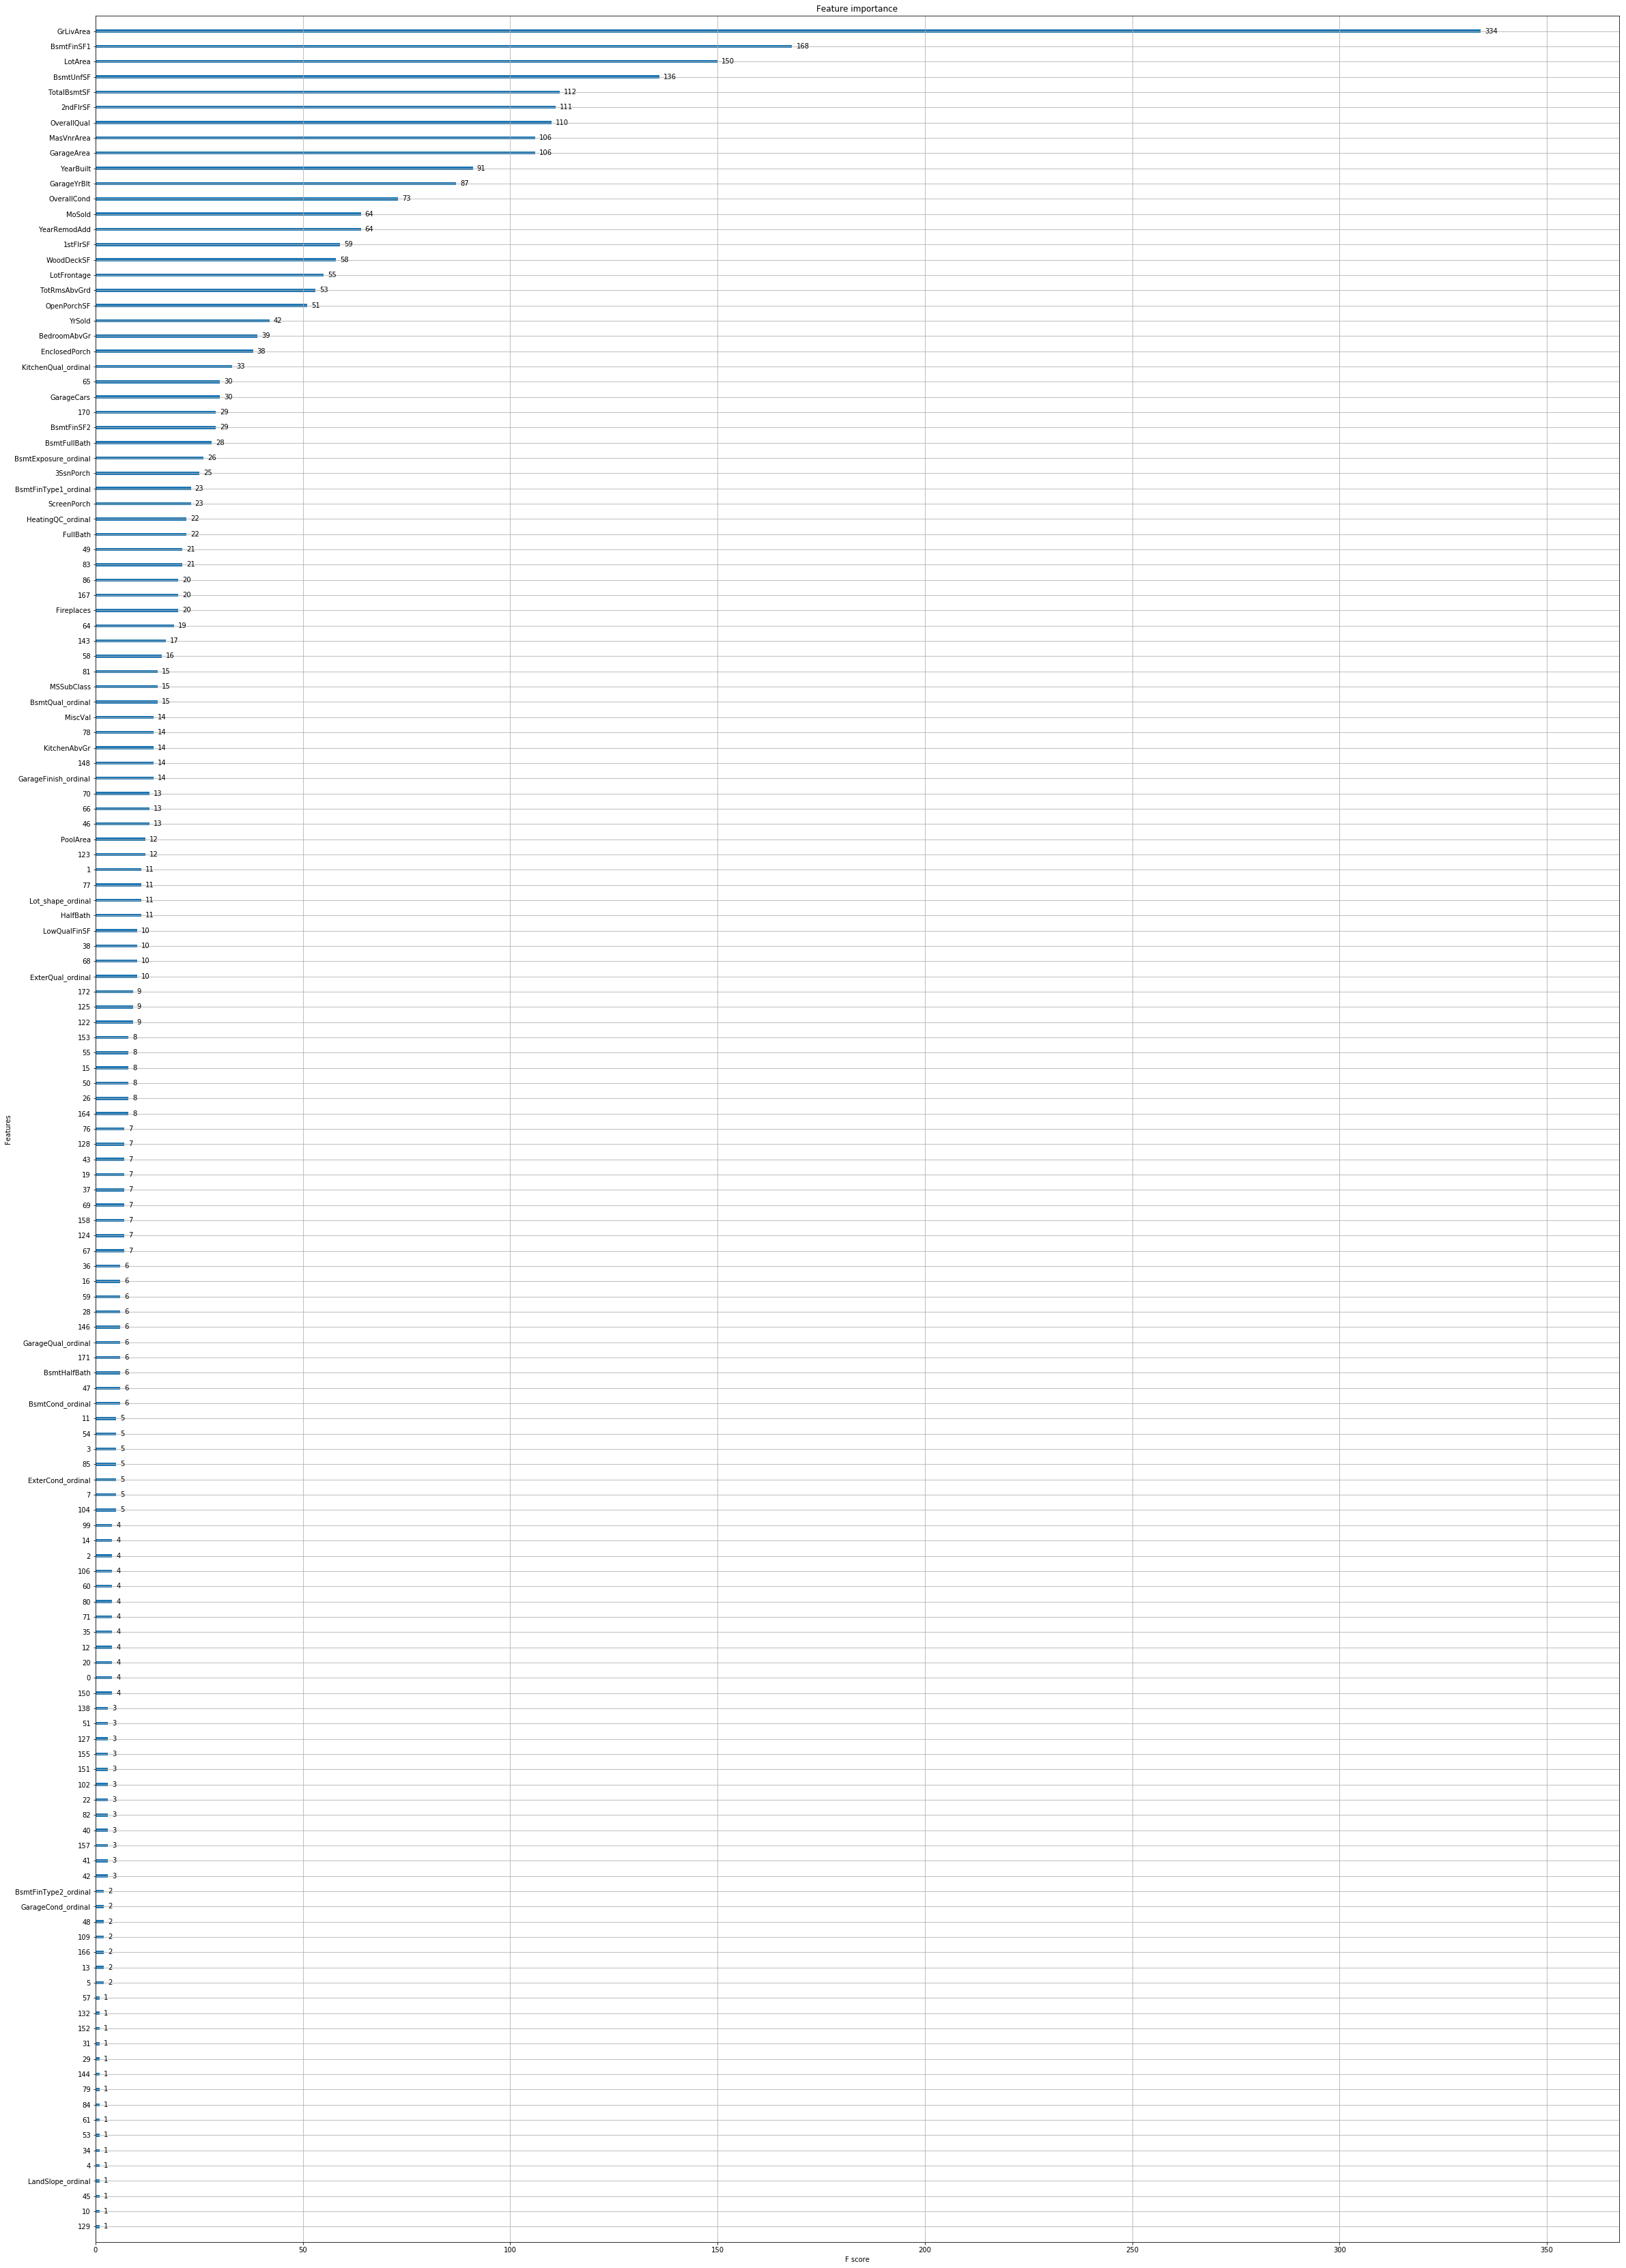

In [337]:
from xgboost import plot_importance

plt.rcParams["figure.figsize"] = (40, 60)
plot_importance(XGB_p)
plt.show()

In [ ]:
test_preds_xbgp = XGB_p.predict(X_test_incomplete)
result_xbgp = pd.DataFrame(test_preds_xbgp)
result_xbgp.columns=['SalePrice']
result_xbgp.reset_index(inplace=True)
result_xbgp.index += 1461
result_xbgp.columns = ['Id','SalePrice']
result_xbgp.Id += 1461

In [ ]:
result_xbgp

In [ ]:
result_xbgp.to_csv('my_output_xgboost_best', index = False)

# Best R2_score= 0.9110988876334617
# Model : XGBoost with parameters : (max_depth=3, learning_rate=0.1, n_estimators=500)
    